# Download the Dataset from Drive

In [3]:
!wget --header="Host: doc-10-9c-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/drive/my-drive" --header="Cookie: AUTH_4lgch8kproorp87c5erpsi9rqpbk46dg=14696292948499217652|1552075200000|8kt1gnca2bnsmmpb20e0n07b3f2h0fl9" --header="Connection: keep-alive" "https://doc-10-9c-docs.googleusercontent.com/docs/securesc/0ga3her86at4fpdr2b9n3spfq1b4g359/vrtrp4is8bnj8gr4qfhetb6mqsnnfkqj/1552075200000/14696292948499217652/14696292948499217652/11P0neVvfVrReXes7ldnX168zqtNl_Zsg?h=06864318269717761326&e=download" -O "lfw.zip" -c

--2019-03-08 20:18:37--  https://doc-10-9c-docs.googleusercontent.com/docs/securesc/0ga3her86at4fpdr2b9n3spfq1b4g359/qalv2tub29d9jbdb50p6us47bn3tha0l/1552032000000/14696292948499217652/14696292948499217652/11P0neVvfVrReXes7ldnX168zqtNl_Zsg?h=06864318269717761326&e=download
Resolving doc-10-9c-docs.googleusercontent.com (doc-10-9c-docs.googleusercontent.com)... 173.194.193.132, 2607:f8b0:4001:c0f::84
Connecting to doc-10-9c-docs.googleusercontent.com (doc-10-9c-docs.googleusercontent.com)|173.194.193.132|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2019-03-08 20:18:37 ERROR 403: Forbidden.



In [6]:
!unzip 'lfw.zip'

Archive:  lfw.zip
   creating: lfw/
   creating: lfw/Aaron_Eckhart/
  inflating: lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg  
   creating: lfw/Aaron_Guiel/
  inflating: lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg  
   creating: lfw/Aaron_Patterson/
  inflating: lfw/Aaron_Patterson/Aaron_Patterson_0001.jpg  
   creating: lfw/Aaron_Peirsol/
  inflating: lfw/Aaron_Peirsol/Aaron_Peirsol_0001.jpg  
  inflating: lfw/Aaron_Peirsol/Aaron_Peirsol_0002.jpg  
  inflating: lfw/Aaron_Peirsol/Aaron_Peirsol_0003.jpg  
  inflating: lfw/Aaron_Peirsol/Aaron_Peirsol_0004.jpg  
   creating: lfw/Aaron_Pena/
  inflating: lfw/Aaron_Pena/Aaron_Pena_0001.jpg  
   creating: lfw/Aaron_Sorkin/
  inflating: lfw/Aaron_Sorkin/Aaron_Sorkin_0001.jpg  
  inflating: lfw/Aaron_Sorkin/Aaron_Sorkin_0002.jpg  
   creating: lfw/Aaron_Tippin/
  inflating: lfw/Aaron_Tippin/Aaron_Tippin_0001.jpg  
   creating: lfw/Abbas_Kiarostami/
  inflating: lfw/Abbas_Kiarostami/Abbas_Kiarostami_0001.jpg  
   creating: lfw/Abba_Eban/
  inflating: lfw

# Loading Libraries and Exploring Dataset

**LOADING LIBRARIES**

In [4]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

from keras.layers import Dense, Dropout, Concatenate, Conv2D, Flatten, MaxPooling2D, Reshape, Input
import os as os
from PIL import Image
from tqdm import tqdm
import tensorflow as tf

import random

Using TensorFlow backend.


**LOADING DATASET**

In [5]:
len(os.listdir('lfw'))

5749

In [6]:
X_anc = []
X_pos = []
X_neg = []

Y = np.zeros((1000, 3, 128))
train_ex = 0

#Use slicing if the memory overflow occurs, load the dataset in parts using list slicing
for i in tqdm(os.listdir('lfw')[:]):  #use list slicing to avoid memory overflow here
  img = image.load_img('lfw/'+i+'/'+os.listdir('lfw/'+i+'/')[0], target_size = (224, 224))
  anc_x = np.array(img)
  anc = preprocess_input(anc_x)
  #anc = np.array(img)
  
  for j in os.listdir('lfw/'+i+'/'):
    img2 = image.load_img('lfw/'+i+'/'+j, target_size = (224, 224))
    pos_x = image.img_to_array(img2)
    pos = preprocess_input(pos_x)
    #pos = np.array(img2)
    
    rand = random.randint(0, len(os.listdir('lfw'))-1)
    person = os.listdir('lfw')[rand]
    while(person == i):
      rand = random.randint(0, len(os.listdir('lfw'))-1)
      person = os.listdir('lfw')[rand]
     
    for k in os.listdir('lfw/'+person+'/'):
      img3 = image.load_img('lfw/'+person+'/'+k, target_size = (224, 224))
      neg_x = image.img_to_array(img3)
      neg = preprocess_input(neg_x)
      #neg = np.array(img3)
      
      #temp = []
      
      #temp.append(anc)
      #temp.append(pos)
      #temp.append(neg)
      
      #X[train_ex][0] = anc
      #X[train_ex][1] = pos
      #X[train_ex][2] = neg
      train_ex+=1
      
      X_anc.append(anc)
      X_pos.append(pos)
      X_neg.append(neg)
      
X_anc = np.array(X_anc, dtype = anc_x.dtype)
X_pos = np.array(X_pos, dtype = anc_x.dtype)
X_neg = np.array(X_neg, dtype = anc_x.dtype)
print(X_anc.shape)
print(X_pos.shape)
print(X_neg.shape)

100%|██████████| 1000/1000 [01:23<00:00, 12.02it/s]


(5355, 224, 224, 3)
(5355, 224, 224, 3)
(5355, 224, 224, 3)


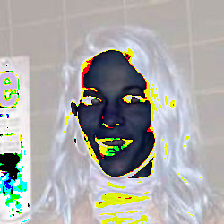

In [7]:
Image.fromarray(X_anc[0], mode = "RGB")

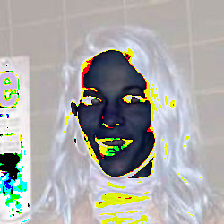

In [8]:
Image.fromarray(X_pos[0], mode = "RGB")

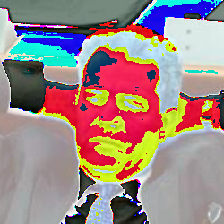

In [9]:
Image.fromarray(X_neg[0], mode = "RGB")

# Building the Model

**BASE MODEL**

In [10]:
basemodel = ResNet50(include_top = False, input_shape = (224, 224, 3))
x = basemodel.output
x = Conv2D(128, (3, 3), strides = 2)(x)
x = Conv2D(128, (3, 3), strides = 1)(x)
x = Reshape((128, ))(x)
basemodel = Model(inputs = basemodel.input, outputs = x)
basemodel.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________

** MAIN MODEL**

In [0]:
def create_model():
    
  anc = Input((224, 224, 3))
  pos = Input((224, 224, 3))
  neg = Input((224, 224, 3))
  
  anc_enc = basemodel(anc)
  pos_enc = basemodel(pos)
  neg_enc = basemodel(neg)
  
  out = Concatenate()([anc_enc, pos_enc, neg_enc])
  print(out.shape)
  
  model = Model(inputs = [anc, pos, neg], outputs = out)
  return model

In [12]:
model = create_model()

(?, 384)


In [13]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 128)          26094720    input_2[0][0]                    
                                                                 input_3[0][0]                    
          

In [0]:
def triplet_loss(y_true, y_pred, alpha = 0.7):
    """
    Implementation of the triplet loss as defined by formula (3)
    
    Arguments:
    y_true -- true labels, required when you define a loss in Keras, you don't need it in this function.
    y_pred -- python list containing three objects:
            anchor -- the encodings for the anchor images, of shape (None, 128)
            positive -- the encodings for the positive images, of shape (None, 128)
            negative -- the encodings for the negative images, of shape (None, 128)
    
    Returns:
    loss -- real number, value of the loss
    """
    
    anchor, positive, negative = y_pred[:,:128], y_pred[:,128:256], y_pred[:,256:]
    
    ### START CODE HERE ### (≈ 4 lines)
    # Step 1: Compute the (encoding) distance between the anchor and the positive, you will need to sum over axis=-1
    pos_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, positive)), axis=-1)
    # Step 2: Compute the (encoding) distance between the anchor and the negative, you will need to sum over axis=-1
    neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, negative)), axis=-1)
    # Step 3: subtract the two previous distances and add alpha.
    basic_loss = tf.add(tf.subtract(pos_dist, neg_dist), alpha)
    # Step 4: Take the maximum of basic_loss and 0.0. Sum over the training examples.
    loss = tf.reduce_sum(tf.maximum(basic_loss, 0))
    ### END CODE HERE ###

    return loss

In [0]:
model.compile(optimizer = 'adam', loss = triplet_loss)

In [0]:
Y = np.zeros((X_anc.shape[0], 384))
model.fit(x = [X_anc, X_pos, X_neg], y = Y, epochs = 40, batch_size = 16, shuffle = False)

In [0]:
model.save_weights('40_epochs.h5')

In [0]:
#model.load_weights('40_epochs.h5')

# Testing the Model

In [19]:
img = image.load_img('younes.jpg', target_size = (224, 224))
anc = image.img_to_array(img)
anc = preprocess_input(anc)
anc = np.expand_dims(anc, axis=0)


img2 = image.load_img('camera_0.jpg', target_size = (224, 224))
pos = image.img_to_array(img2)
pos = preprocess_input(pos)
pos = np.expand_dims(pos, axis=0)

img3 = image.load_img('camera_2.jpg', target_size = (224, 224))
neg = image.img_to_array(img3)
neg = preprocess_input(neg)
neg = np.expand_dims(neg, axis=0)

enc = model.predict([anc, pos, neg], verbose=True)
anc_enc = enc[0, :128]
pos_enc = enc[0, 128:256]
neg_enc = enc[0, 256:]

1/1 [==============================] - 5s 5s/step


In [20]:
pos_dist = np.sum((anc_enc - pos_enc)**2)
pos_dist

0.24674013

In [21]:
neg_dist = np.sum((anc_enc - neg_enc)**2)
neg_dist

0.6024414

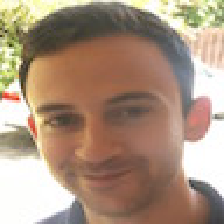

In [22]:
img

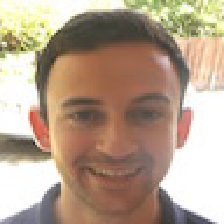

In [23]:
img2

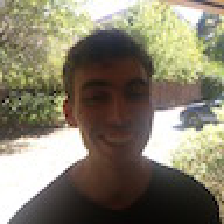

In [24]:
img3